Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [ ]:
#loading the dataset
advert = pd.read_csv('Advertising.csv')
advert.head()
#to check the first five entries of the dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
advert.info()
#to check all entries number in all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
#removing the index column
advert.columns
#to get the columns name

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
advert.drop(['Unnamed: 0'],axis = 1, inplace = True)
#axis = 1 since we are dropping a column and inplace is true since we want to do it in the orginal dataframe
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


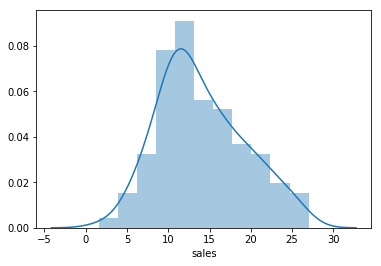

In [ ]:
#visualizing the data
import seaborn as sns
sns.distplot(advert.sales);

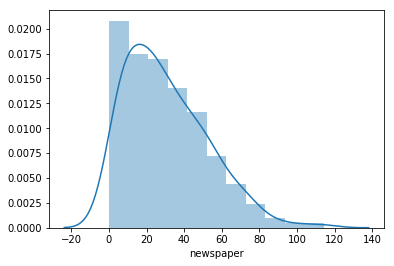

In [ ]:
sns.distplot(advert.newspaper);

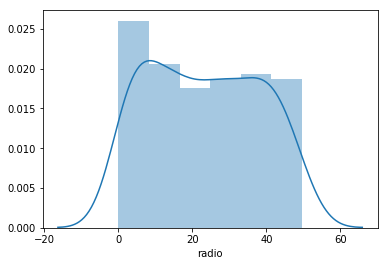

In [ ]:
sns.distplot(advert.radio);

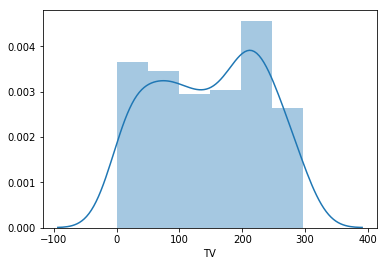

In [ ]:
sns.distplot(advert.TV);

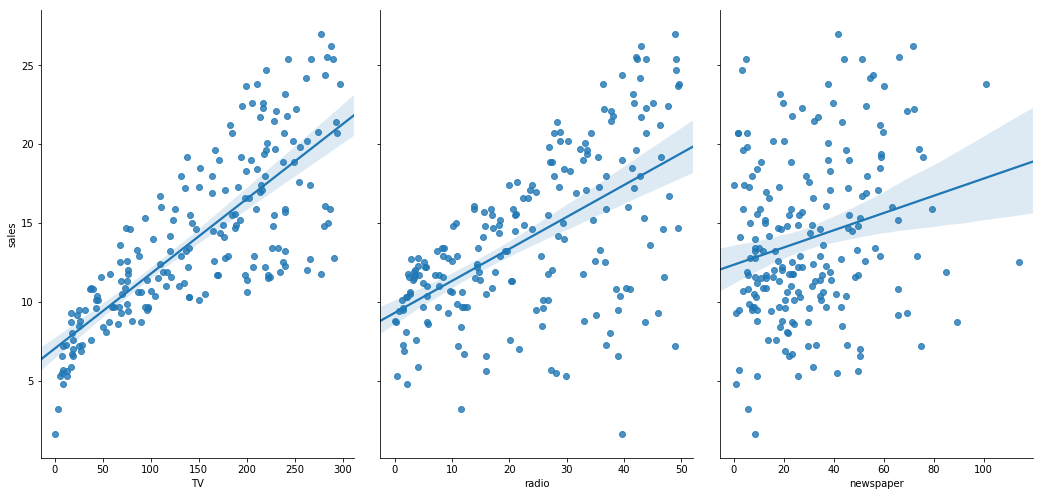

In [ ]:
#to check the relationship between various variables
sns.pairplot(advert, x_vars = ['TV','radio', 'newspaper'], y_vars = 'sales', height = 7,
            aspect = 0.7, kind = 'reg');

In [ ]:
#to check the pearson constant
advert.TV.corr(advert.sales)

0.7822244248616061

In [ ]:
advert.corr()
#to check the correlation of all the variables

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


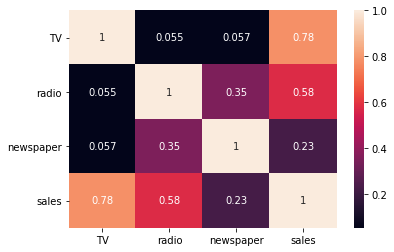

In [ ]:
#plotting heat map for the correlation coefficients
sns.heatmap( advert.corr(), annot = True);

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [ ]:
X = advert[['TV']]
X.head()
#creating our features

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
#to check the type and shape of data
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [ ]:
#preparing the labels
y = advert.sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [ ]:
from sklearn.model_selection import train_test_split
#preparing the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#to print the shapes of the data

(150, 1)
(50, 1)
(150,)
(50,)


In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
#training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
print(linreg.intercept_)
print(linreg.coef_)
#to check the parameters value

7.13178450668533
[0.04689446]


In [ ]:
#predictions with the model
y_pred = linreg.predict(X_test)
y_pred[:5]

array([14.78964913, 16.29496116, 20.86717059,  7.68044964, 17.4626331 ])

In [ ]:
#model evalution metrics
true = [100, 50, 30, 20]
pred = [90, 50, 50 ,30]
#checking the working of metrics on the example data

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [ ]:
print((10 + 0 + 20 + 10) / 4)
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [ ]:
print((100 + 0 + 20**2 + 100) / 4)
from sklearn import metrics
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [ ]:
print(np.sqrt((100 + 0 + 20**2 + 100) / 4))
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [ ]:
#evaluation of the model
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.029735726164873
